## Imports

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score


# Linear Regression

🎯 In this exercise, you will model the performance of an NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [23]:
# YOUR CODE HERE
#load NBA.csv into a dataframe called nba
nba = pd.read_csv('NBA.csv')
nba.head()


,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define Feature Set and Target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` is the target.

In [24]:
# YOUR CODE HERE
X = nba[['mp']]
y = nba['win_rating']
model = LinearRegression()
# print(model.fit(X, y))
# print(model.coef_)
# print(model.intercept_)


👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

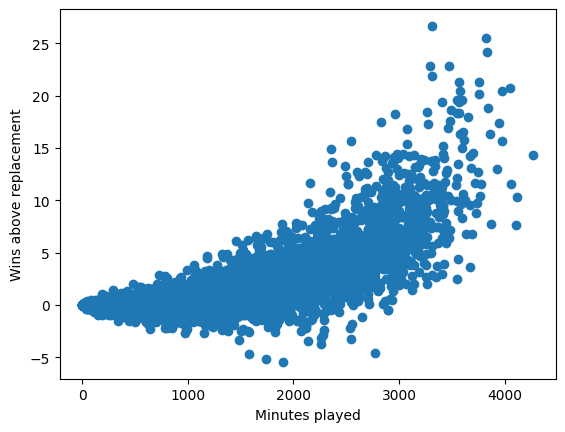

In [25]:
# YOUR CODE HERE
plt.scatter(nba['mp'], nba['win_rating'])

# Labels
plt.xlabel("Minutes played")
plt.ylabel("Wins above replacement")

plt.show()


ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-Validation

👇 Using Sklearn's [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), run a 5-fold cross-validation on a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model predicting the player performance rating from minutes played. Save the raw output of the cross-validation under a new variable called `cv_results`.

In [26]:
# YOUR CODE HERE
# 5-fold cross validation
cv_results = cross_validate(model, X, y, cv=5)
# Print all the scores of 5 folds
print("The scores of each fold: ",cv_results['test_score'])
# Print the mean accuracy score
mean_score = cv_results['test_score'].mean()
print("Mean score: ",mean_score)


The scores of each fold:  [0.5555057  0.53447908 0.53790391 0.57658459 0.57917762]
Mean score:  0.556730180006891


❓ What is the lowest score of the cross-validation? Compute your answer and save the value under a new variable called `min_score`.

In [27]:
# YOUR CODE HERE
# lowest score of the cross-validation
min_score = cv_results['test_score'].min()
print("Lowest score: ",min_score)


Lowest score:  0.5344790822272503


❓ What is the highest score of the cross-validation?  Compute your answer and save the value under a new variable called `max_score`.

In [28]:
# YOUR CODE HERE
# highest score of the cross-validation
max_score = cv_results['test_score'].max()
print("Lowest score: ",max_score)


Lowest score:  0.5791776193355004


❓ What is the mean score of the cross-validation? Compute your answer and save the value under a new variable called `mean_score`.

In [29]:
# YOUR CODE HERE
mean_score


0.556730180006891

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [30]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as `K` increases from 2 to 20.

In [39]:
# YOUR CODE HERE
# Plot the evolution of total computational time (fitting and scoring)
# and mean score as `K` increases from 2 to 20.

total_computation_time = []
mean_score = []
for i in range(2, 21):
    model = LinearRegression()
    cv_results = cross_validate(model, X, y, cv=i)
    total_computation_time.append(cv_results['fit_time'].sum() + cv_results['score_time'].sum())
    mean_score.append(cv_results['test_score'].mean())

print("Total computational time(fitting and scoring): ", total_computation_time)

print("Mean scores: ",mean_score)


Total computational time(fitting and scoring):  [0.007557868957519531, 0.010852336883544922, 0.012656688690185547, 0.015135526657104492, 0.018567323684692383, 0.02068042755126953, 0.023507118225097656, 0.026674747467041016, 0.02866959571838379, 0.028165817260742188, 0.03151226043701172, 0.033447980880737305, 0.03450369834899902, 0.036728620529174805, 0.03906989097595215, 0.03991818428039551, 0.04172015190124512, 0.04456758499145508, 0.05464363098144531]
Mean scores:  [0.5585953456775263, 0.5586660529802963, 0.5593666259668205, 0.556730180006891, 0.5585239978698054, 0.5591598213023138, 0.5592067633158935, 0.5587039079067392, 0.5568678806855818, 0.5574423923917567, 0.5597840270097336, 0.5592188591410787, 0.560203926449041, 0.558316628931251, 0.55920902727961, 0.5594257624294945, 0.559576056746282, 0.556773505469385, 0.5573895158123787]


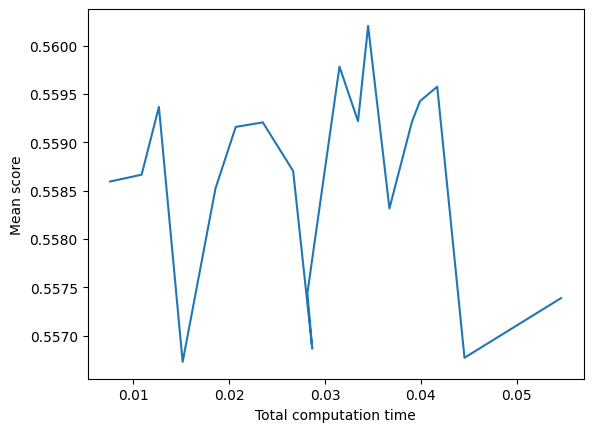

In [40]:
# YOUR CODE HERE
plt.plot(total_computation_time, mean_score)
plt.ylabel("Mean score")
plt.xlabel("Total computation time")
plt.show()


ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the Model

Cross-validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross-validation.

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

In [41]:
# YOUR CODE HERE
model = model.fit(X, y)


❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under a variable named `slope`.

In [46]:
# YOUR CODE HERE
# model.fit(X, y)
slope = model.coef_[0]
print("The coefficient of the model is: ",slope)


The coefficient of the model is:  0.002602579938640193


❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [43]:
# YOUR CODE HERE
intercept = model.intercept_
print("The intercept of the model is: ",intercept)


The intercept of the model is:  -1.5463749371639444


🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [47]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted value in a variable called `prediction`.

In [48]:
# YOUR CODE HERE
# Predict the performance rating for a player who played 1000 minutes in total.
prediction = model.predict([[1000]])
print(prediction)


[1.056205]


/Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### ☑️ Test your code

In [49]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio, and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

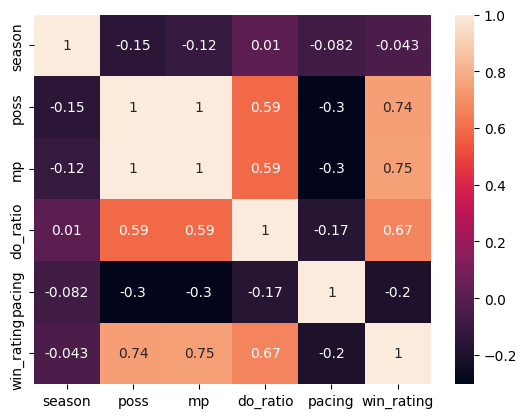

In [50]:
# YOUR CODE HERE
sns.heatmap(nba.corr(), annot=True)
plt.show()


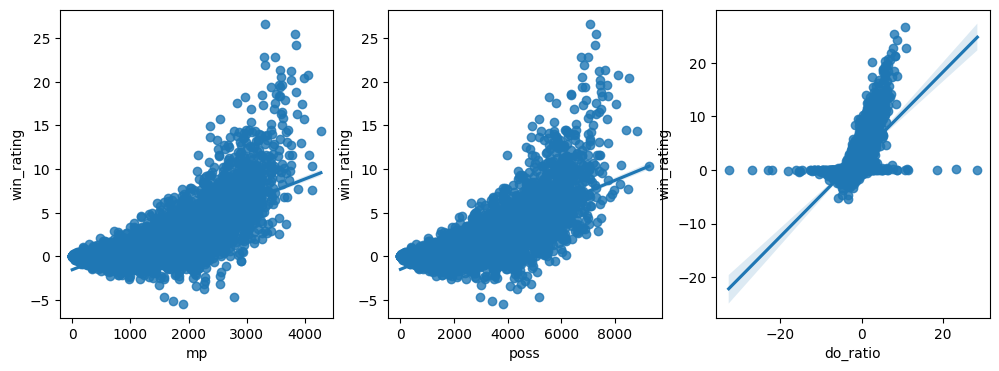

In [63]:
# create 2 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

sns.regplot(x="mp", y="win_rating", data=nba, ax=ax1)

sns.regplot(x="poss", y="win_rating", data=nba, ax=ax2)

sns.regplot(x="do_ratio", y="win_rating", data=nba, ax=ax3)

plt.show()


<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [53]:
# YOUR CODE HERE
#Create a new set of features with columns 'mp' and 'poss'.
X2 = nba[['mp', 'poss']]
y = nba['win_rating']
model1 = LinearRegression()


❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [60]:
# YOUR CODE HERE
mean_2_feat_score1 = cross_val_score(model1, X2, y, cv=5).mean()
print(mean_2_feat_score1)


0.557266329773699


In [61]:
mean_2_feat_score = cross_val_score(LinearRegression(),
                                     nba[['mp', 'do_ratio']],
                                     nba['win_rating'],
                                     cv=5).mean()
print(mean_2_feat_score)


0.6317728310765246


### ☑️ Test your code

In [62]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



You should see an **increase of around 8%** in your $R^2$ 👏

Congrats, you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁